<a href="https://colab.research.google.com/github/deeksha2805/DataScience_Bootcamp/blob/master/Survival_of_a_patient_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective**# 
A hospital in the province of Greenland has been trying to improve its care conditions by looking at historic survival of the patients. They tried looking at their data but could not identify the main factors leading to high survivals.

You are the best data scientist in Greenland and they’ve hired you to solve this problem. Now you are responsible for developing a model that will predict the chances of survival of a patient after 1 year of treatment (Survived_1_year).


# **Dataset & Data Description**

The dataset contains the patient records collected from a hospital in Greenland. The “Survived_1_year” column is a target variable which has binary entries (0 or 1).

Survived_1_year == 0, implies that the patient did not survive after 1 year of treatment
Survived_1_year == 1, implies that the patient survived after 1 year of treatment

# **Evaluation** **Criteria**
Submissions are evaluated using the F1 Score. How do we do it? 

Once you generate and submit the target variable predictions on evaluation dataset, your submissions will be compared with the true values of the target variable. 

The True or Actual values of the target variable are hidden on the DPhi Practice platform so that we can evaluate your model's performance on evaluation data. Finally, an F1 score for your model will be generated and displayed

## Import the libraries

In [ ]:
import numpy as np      # library for numerical computations
import pandas as pd     # library for data analysis

#libraries for data visualization
import matplotlib.pyplot as plt    
import seaborn as sns

# libraries for data pre-processing 

from sklearn.model_selection import train_test_split   # to split the data set into train and test set

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder   # for converting data from categorical to numerical value

# to ignore warnings

import warnings 
warnings.filterwarnings("ignore")

## Load data

In [ ]:
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

**Data Description:**



*   **ID_Patient_Care_Situation:** Care situation of a patient during treatment
* **Diagnosed_Condition:** The diagnosed condition of the patient
* **ID_Patient**: Patient identifier number
* **Treatment_with_drugs:** Class of drugs used during treatment
* **Survived_1_year:** If the patient survived after one year (0 means did not survive; 1 means survived)
* **Patient_Age:** Age of the patient
* **Patient_Body_Mass_Index:** A calculated value based on the patient’s weight, height, etc.
* **Patient_Smoker:** If the patient was a smoker or not
* **Patient_Rural_Urban:** If the patient stayed in Rural or Urban part of the country
Previous_Condition: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. )




DEFINE THE PROBLEM:


*   What are we trying to predict?
*   What is the input data?
*   Which is the target feature?
*   Type of problem?


# **Step 1: Exploratory Data Analysis**

In [ ]:
#first five observations of the data set
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [ ]:
#summary of the data
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

**Observations**:



*   There are 23097 observations divided into 18 columns.
*   There are some missing values in the dataset.




In [ ]:
#summary of various statistical measures
pharma_data.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


Defining the problem:


*   Prediction: Predict the chances of survival of a patient after 1 year of treatment.
*   Input data: Details of treatments taken by a patient in a year.
*   Target feature: Survived_1_year
*   Type of problem: Classification





# **Step 2: Data Visualisation**

In [ ]:
# Target variable of our data set
pharma_data['Survived_1_year'].value_counts()

1    14603
0     8494
Name: Survived_1_year, dtype: int64

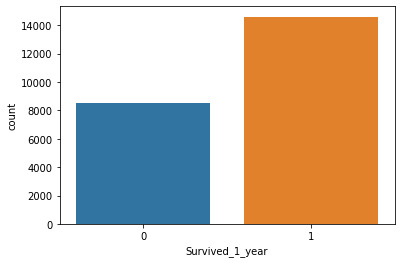

In [ ]:
sns.countplot(pharma_data.Survived_1_year)

In [ ]:
# Visualization of Numerical data
numeric_features = pharma_data.select_dtypes(include=[np.number])    # select_dtypes helps you to select data of particular types 
numeric_features.columns


Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Patient_Age', 'Patient_Body_Mass_Index', 'A', 'B', 'C', 'D', 'E', 'F',
       'Z', 'Number_of_prev_cond', 'Survived_1_year'],
      dtype='object')

In [ ]:
numeric_data=pharma_data[['Diagnosed_Condition', 'Patient_Age', 'Patient_Body_Mass_Index', 'Number_of_prev_cond', 'Survived_1_year']]  #keeping in the target varibale for analysis purposes
numeric_data.head()

# ID_Patient_Care_Situation and Patient_ID are just an ID we can ignore them for data analysis.
# Number_of_prev_cond is dependent on 7 columns - A, B, C, D, E, F, Z

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Survived_1_year
0,8,56,18.479385,2.0,0
1,5,36,22.945566,1.0,1
2,23,48,27.510027,1.0,0
3,51,5,19.130976,1.0,1
4,0,128,1.348400,1.0,1


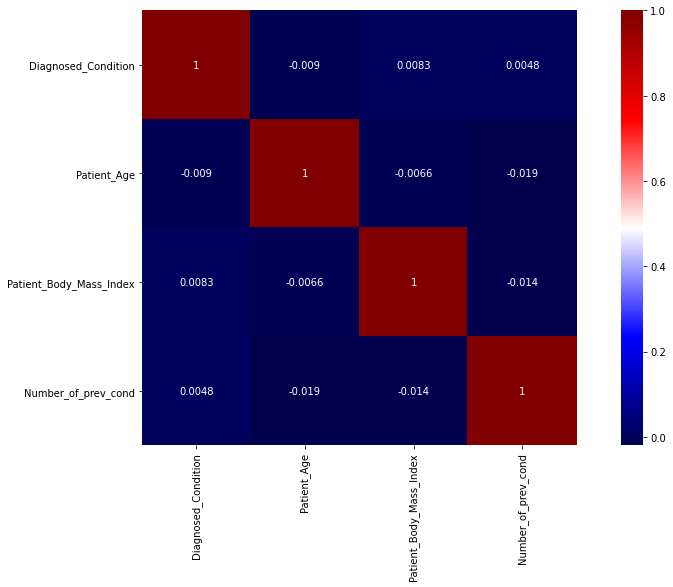

In [ ]:
numeric_data=numeric_data.drop(['Survived_1_year'], axis=1)
plt.figure(figsize= (16, 8))
sns.heatmap(numeric_data.corr(),
            cmap = 'seismic',
            square = True,
            annot = True)
plt.show()

In [ ]:
# Visualization of Categorical data
categorical_data = pharma_data.drop(numeric_data.columns, axis=1)    # dropping the numerical columns from the dataframe 'data'
categorical_data.drop(['Patient_ID', 'ID_Patient_Care_Situation'], axis=1, inplace = True)    # dropping the id columns from the dataframe 'categorical data'
categorical_data.head()    # Now we are left with categorical columns only. take a look at first five observaitons

,Treated_with_drugs,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Survived_1_year
0,DX6,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,DX2,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,DX6,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,DX1,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,NaN,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [ ]:
categorical_data.nunique()

Treated_with_drugs          32
Patient_Smoker               3
Patient_Rural_Urban          2
Patient_mental_condition     1
A                            2
B                            2
C                            2
D                            2
E                            2
F                            2
Z                            2
Survived_1_year              2
dtype: int64

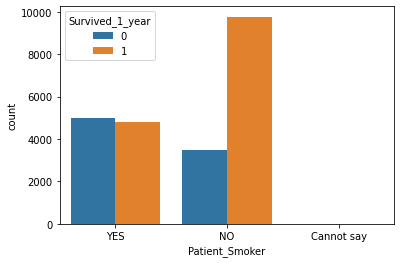

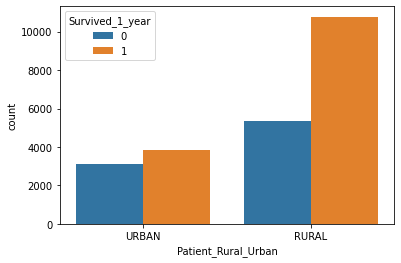

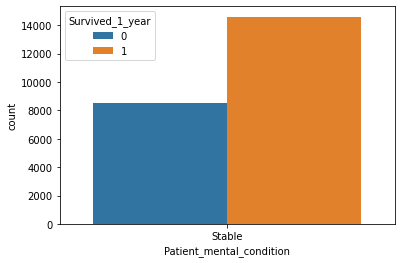

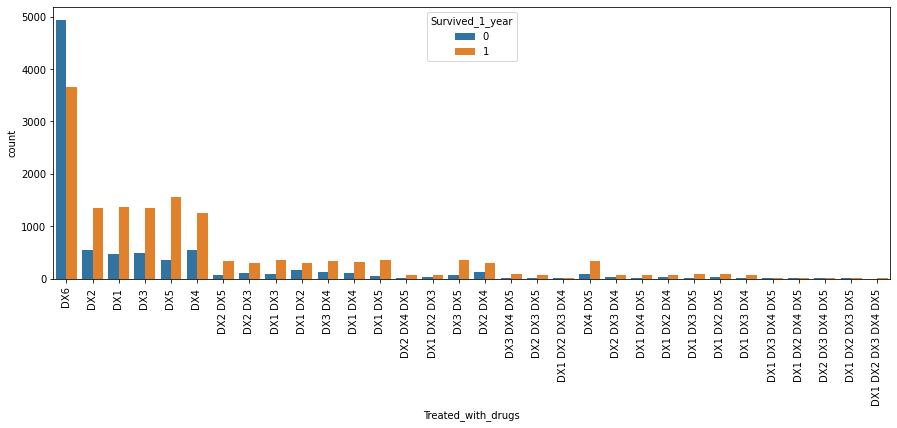

In [ ]:
# Visualization of categorical columns
for feature in ['Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition']:
  sns.countplot(x=feature,  hue='Survived_1_year', data=categorical_data)
  plt.show()


plt.figure(figsize=(15,5))
sns.countplot(x='Treated_with_drugs',  hue='Survived_1_year', data=categorical_data)
plt.xticks(rotation=90)
plt.show()

# **Step 3: Data Pre-processing**

In [ ]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [ ]:
pharma_data["Treated_with_drugs"].fillna( method ='bfill', inplace = True)
pharma_data["A"].fillna( method ='bfill', inplace = True)
pharma_data["B"].fillna( method ='bfill', inplace = True)
pharma_data["C"].fillna( method ='bfill', inplace = True)
pharma_data["D"].fillna( method ='bfill', inplace = True)
pharma_data["E"].fillna( method ='bfill', inplace = True)
pharma_data["F"].fillna( method ='bfill', inplace = True)
pharma_data["Z"].fillna( method ='bfill', inplace = True)
pharma_data.Number_of_prev_cond.fillna(pharma_data['Number_of_prev_cond'].mean(), inplace=True)
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,DX6,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1




*  Re-check if the null values are removed or not.




In [ ]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64



*  Transforming categorical data into numerical values




In [ ]:
pharma_data["Treated_with_drugs"].fillna("DX0", inplace = True)
le = LabelEncoder()
pharma_data.Treated_with_drugs = le.fit_transform(pharma_data.Treated_with_drugs)
pharma_data.Patient_Smoker = le.fit_transform(pharma_data.Patient_Smoker)
pharma_data.Patient_Rural_Urban = le.fit_transform(pharma_data.Patient_Rural_Urban)
pharma_data.Patient_mental_condition = le.fit_transform(pharma_data.Patient_mental_condition)
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,31,56,18.479385,2,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,16,36,22.945566,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,31,48,27.510027,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,0,5,19.130976,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,31,128,1.348400,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1






*   Removing unnecessary column






In [ ]:
pharma_data.drop('Patient_mental_condition', axis=1, inplace=True)
pharma_data.shape

(23097, 17)

# **Step 4: Training the test data**

In [ ]:
X = pharma_data.drop('Survived_1_year', axis = 1)
y = pharma_data['Survived_1_year']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
pharma_data.shape

(23097, 17)

# **Step 5: Model Building**

### **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 1001, random_state = 1, n_jobs = -1, min_samples_split= 3,bootstrap=True, criterion='gini' )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

True Positive 3838
True Negative 1837
False Positive 702
False Negative 553


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.8189033189033189

In [ ]:
from sklearn.metrics import f1_score
print("F1 Score: ",f1_score(y_test, y_pred))

F1 Score:  0.8594782219236368


## **Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators = 1003, random_state= 1, verbose = 0, min_samples_split= 4, learning_rate=0.04, 
                                 criterion='friedman_mse', loss='deviance')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

True Positive 3911
True Negative 1900
False Positive 639
False Negative 480


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.8385281385281386

In [ ]:
from sklearn.metrics import f1_score
print("F1 Score: ",f1_score(y_test, y_pred))

F1 Score:  0.8748462140700145


# **Step 6: Feature Selection (XGBoost)**

In [ ]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [ ]:
classifier=xgboost.XGBClassifier()

In [ ]:
model=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)
y_pred

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   24.7s finished


array([1, 0, 0, ..., 0, 1, 1])

In [ ]:

model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1,
              learning_rate=0.25, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_train,y_train.ravel(),cv=5)

In [ ]:
score = accuracy_score(y_test, y_pred)
score

0.834920634920635

In [ ]:
score = f1_score(y_test, y_pred)
score

0.8719785138764548

In [ ]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(iterations=1000,
                                 depth=6,
                                 eval_metric = 'F1',
                                 leaf_estimation_iterations = 10,
                                 learning_rate= 0.1, 
                                 max_bin= 255, 
                                 n_estimators= 555, 
                                 num_leaves= 6,
                                use_best_model=True)
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
score = accuracy_score(y_test, y_pred)
score

0.845021645021645

In [ ]:
score = f1_score(y_test, y_pred)
score

0.879217273954116

In [ ]:
!pip install catboost
!pip install ipywidgets

     |████████████████████████████████| 65.9MB 60kB/s 


In [ ]:
import catboost 
from catboost import CatBoostClassifier, Pool, cv

In [ ]:
model = CatBoostClassifier(
    random_seed=18,logging_level='Silent',
    iterations=1000,learning_rate=0.015,depth=6,
   l2_leaf_reg=5,loss_function='Logloss',
   leaf_estimation_iterations=10
)
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
score = accuracy_score(y_test, y_pred)
score

0.8382395382395382

In [ ]:
score = f1_score(y_test, y_pred)
score

0.8756240985243536

# **Step 8: Predicting unseen dataset**

In [ ]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [ ]:
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
test_new.shape

(9303, 17)

In [ ]:
test_new.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
dtype: int64

In [ ]:
test_new["Treated_with_drugs"].fillna("DX0", inplace = True)
le = LabelEncoder()
test_new.Treated_with_drugs = le.fit_transform(test_new.Treated_with_drugs)
test_new.Patient_Smoker = le.fit_transform(test_new.Patient_Smoker)
test_new.Patient_Rural_Urban = le.fit_transform(test_new.Patient_Rural_Urban)
test_new.Patient_mental_condition = le.fit_transform(test_new.Patient_mental_condition)

In [ ]:
test_new.drop('Patient_mental_condition', axis=1, inplace=True)

In [ ]:
pharma_data = model.predict(test_new)

In [ ]:
res = pd.DataFrame(pharma_data)
res.index = test_new.index # its important for comparison
res.columns = ["Survived_1_year"]

from google.colab import files
res.to_csv("prediction_Survived_1_year.csv")      
files.download('prediction_Survived_1_year.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>